# Módulo 4 Sprint

**Objetivo del proyecto**
*(Competencias del módulo)*


Elaborar inferencias estadísticas a una muestra para la estimación de una población de acuerdo a los requerimientos de análisis.

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

house = pd.read_csv('house.csv')
df_house = pd.DataFrame(house)

df_house = df_house.drop(columns=['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'LotFrontage'])

df_house



,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [147]:
elegidas = ['LotArea', 'OverallCond', 'YearBuilt', 'Foundation', '1stFlrSF', 'FullBath', 'SaleCondition', 'SalePrice']

columnas_a_eliminar = [col for col in df_house.columns if col not in elegidas]
df_elegido = df_house.drop(columns=columnas_a_eliminar)

df_elegido.describe()


,LotArea,OverallCond,YearBuilt,1stFlrSF,FullBath,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,5.575342,1971.267808,1162.626712,1.565068,180921.195890
std,9981.264932,1.112799,30.202904,386.587738,0.550916,79442.502883
min,1300.000000,1.000000,1872.000000,334.000000,0.000000,34900.000000
25%,7553.500000,5.000000,1954.000000,882.000000,1.000000,129975.000000
50%,9478.500000,5.000000,1973.000000,1087.000000,2.000000,163000.000000
75%,11601.500000,6.000000,2000.000000,1391.250000,2.000000,214000.000000
max,215245.000000,9.000000,2010.000000,4692.000000,3.000000,755000.000000


In [148]:
df_elegido

,LotArea,OverallCond,YearBuilt,Foundation,1stFlrSF,FullBath,SaleCondition,SalePrice
0,8450,5,2003,PConc,856,2,Normal,208500
1,9600,8,1976,CBlock,1262,2,Normal,181500
2,11250,5,2001,PConc,920,2,Normal,223500
3,9550,5,1915,BrkTil,961,1,Abnorml,140000
4,14260,5,2000,PConc,1145,2,Normal,250000
...,...,...,...,...,...,...,...,...
1455,7917,5,1999,PConc,953,2,Normal,175000
1456,13175,6,1978,CBlock,2073,2,Normal,210000
1457,9042,9,1941,Stone,1188,2,Normal,266500
1458,9717,6,1950,CBlock,1078,1,Normal,142125


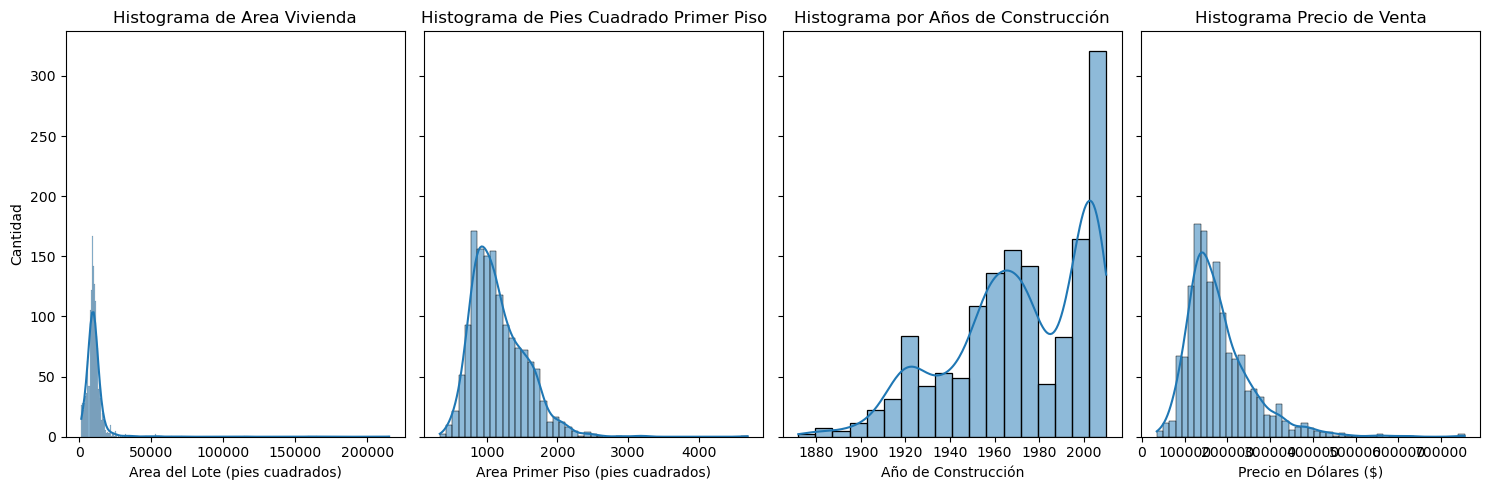

In [151]:
# Crear subplots
fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharey=True)


sns.histplot(ax=axes[0], data=df_elegido, x='LotArea', kde=True)
axes[0].set_title('Histograma de Area Vivienda')
axes[0].set_ylabel('Cantidad')
axes[0].set_xlabel('Area del Lote (pies cuadrados)')
# Histograma para Feature2
sns.histplot(ax=axes[1], data=df_elegido, x='1stFlrSF', kde=True)
axes[1].set_title('Histograma de Pies Cuadrado Primer Piso')
axes[1].set_xlabel('Area Primer Piso (pies cuadrados)')

sns.histplot(ax=axes[2], data=df_elegido, x='YearBuilt', kde=True)
axes[2].set_title('Histograma por Años de Construcción')
axes[2].set_xlabel('Año de Construcción')

sns.histplot(ax=axes[3], data=df_elegido, x='SalePrice', kde=True)
axes[3].set_title('Histograma Precio de Venta')
axes[3].set_xlabel('Precio en Dólares ($)')

plt.tight_layout()
plt.show()


